# Final Report: Predicting Customer Response to Marketing Campaigns
### Group 3: Helena Sokolovska, Alec Neme, Senlin Sun, Benjamin Huo
### STAT 301 (101)
### Dec 6, 2025

In [31]:
# install.packages("ggtern")
# install.packages("ggcorrplot")
# install.packages("cowplot")
# install.packages("patchwork")
# install.packages("gridExtra")
# install.packages("png")
# install.packages("grid")
# install.packages("tidyverse")
# install.packages("dplyr")
# install.packages("nnet")
# install.packages("broom")
# install.packages("DT")

library(tidyverse)
# library(ggtern)
library(dplyr)
# library(ggcorrplot)
# library(cowplot)
# library(patchwork)
# library(gridExtra)
# library(png)
# library(grid)
# library(nnet)
# library(broom)
library(broom)
library(MASS)
library(glmbb)
library(cowplot)
library(glmnet)
library(knitr)
library(caret)
library(tidyverse)
library(data.table)
library(broom)
library(scales)
library(knitr)
library(DT)

# Can we predict whether a customer will accept the company’s next marketing campaign using their demographic, lifestyle, and purchasing characteristics?

# Introduction (Senlin)

Start with relevant background information on the topic to prepare those unfamiliar for the rest of your proposal. Motivate the question you are about to add.

Formulate one broad question for investigation that would require you to incorporate fitting several models in your analysis, using the same response variable and 2 or more covariates. Indicate if the primary goal is inference or prediction. Make sure that the question(s) can be answered with the data available. For example, you won't be able to quantify the "effect of X on Y" or "the influence of X on Y" or "how X affects Y" using the methods learned in class and observational data.

If available, align your question/objectives with the existing literature on the topic. You can add a reference to a scientific publication if available and listed in the References section (not mandatory). 

Customer personality analysis is a key element of business planning and strategizing, helping modify their products based on different target customers from different customer categories. This comes especially useful as instead of spending a ton of money marketing every product to every customer, the company can focus on marketing to a specific target category to increase sales. With access to existing data, we are able to find out which customers are likely to accept a company's marketing campaign based on analysis of their characteristics.

**Research Question: Can we predict whether a customer will accept the company’s next marketing campaign using their demographic, lifestyle, and purchasing characteristics?**

We chose this research question because it allows us to build a model that predicts the likelihood of a customer accepting the company's next marketing campaign based on their attributes, allowing for the company to choose the subset of attributes that best predicts which customers are most likely to purchase which products.

# Methods and Results

## Data (Helena)

- read the data into R using reproducible code (i.e., from an open source and not a local directory in your server or computer)
- include a citation of its source
- include any information you have about data collection (e.g., observational vs experimental)
- describe the variables as done in your Stage 1 Report.
- if (absolutely) needed, indicate which variables will be pre-selected (or dropped) and provide a clear justification of your selection.
   - If your goal is prediction, you should keep all variables in the analysis and perform variable selection based on model performance.

- The [Customer Personality Analysis](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis/data) dataset was provided by Dr. Omar Romero-Hernandez and published by user Akash Patel on Kaggle.
- This is a detailed collection of a company's customer history, with customer demographics, behavior, products purchased, and route (channel) of purchase.
- The observational dataset recorded 29 variables for 2240 customers, though it is not known how this data was sampled or collected.

| Variable                | Description                                                        | Type                 |
| ----------------------- | ------------------------------------------------------------------ | -------------------- |
| **Demographics**        |                                                                    |                      |
| `ID`                    | Customer's unique identifier                                       | Numeric              |
| `Year_Birth`            | Customer's birth year                                              | Numeric: Temporal    |
| `Education`             | Customer's education level                                         | Categorical: Ordinal |
| `Marital_Status`        | Customer's marital status                                          | Categorical: Nominal |
| `Income`                | Customer's yearly household income                                 | Numeric              |
| `Kidhome`               | Number of children in customer's household                         | Numeric              |
| `Teenhome`              | Number of teenagers in customer's household                        | Numeric              |
| **Behavior**            |                                                                    |                      |
| `Dt_Customer`           | Date of customer's enrollment with the company                     | Numeric: Temporal    |
| `Recency`               | Number of days since customer's last purchase                      | Numeric              |
| `NumWebVisitsMonth`     | Number of visits to company’s website in the last month            | Numeric              |
| `NumDealsPurchases`<br> | Number of purchases made with a discount                           | Numeric              |
| `AcceptedCmp1`          | 1 if customer accepted the offer in the 1st campaign, 0 otherwise  | Categorical: Binary  |
| `AcceptedCmp2`          | 1 if customer accepted the offer in the 2nd campaign, 0 otherwise  | Categorical: Binary  |
| `AcceptedCmp3`          | 1 if customer accepted the offer in the 3rd campaign, 0 otherwise  | Categorical: Binary  |
| `AcceptedCmp4`          | 1 if customer accepted the offer in the 4th campaign, 0 otherwise  | Categorical: Binary  |
| `AcceptedCmp5`          | 1 if customer accepted the offer in the 5th campaign, 0 otherwise  | Categorical: Binary  |
| `Response`              | 1 if customer accepted the offer in the last campaign, 0 otherwise | Categorical: Binary  |
| `Complain`              | 1 if the customer complained in the last 2 years, 0 otherwise      | Categorical: Binary  |
| `Z_CostContact`         | Unclear: all observations are 3                                    | Numeric              |
| `Z_Revenue`             | Unclear: all observations are 11                                   | Numeric              |
| **Products**            |                                                                    |                      |
| `MntWines`              | Amount spent on wine in last 2 years                               | Numeric              |
| `MntFruits`             | Amount spent on fruits in last 2 years                             | Numeric              |
| `MntMeatProducts`       | Amount spent on meat in last 2 years                               | Numeric              |
| `MntFishProducts`       | Amount spent on fish in last 2 years                               | Numeric              |
| `MntSweetProducts`      | Amount spent on sweets in last 2 years                             | Numeric              |
| `MntGoldProds`          | Amount spent on gold in last 2 years                               | Numeric              |
| **Channel**             |                                                                    |                      |
| `NumWebPurchases`       | Number of purchases made through the company’s website             | Numeric              |
| `NumCatalogPurchases`   | Number of purchases made using a catalogue                         | Numeric              |
| `NumStorePurchases`     | Number of purchases made directly in stores                        | Numeric              |

### Pre-Selection of Variables

In [ ]:
customers <- read_tsv("http://raw.githubusercontent.com/hesoru/STAT_301_Group_3/refs/heads/main/marketing_campaign.csv")
head(customers)

Rows: 2240 Columns: 29
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (3): Education, Marital_Status, Dt_Customer
dbl (26): ID, Year_Birth, Income, Kidhome, Teenhome, Recency, MntWines, MntF...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [33]:
sapply(customers, function(x) length(unique(x)))

ID          Year_Birth           Education      Marital_Status 
               2240                  59                   5                   8 
             Income             Kidhome            Teenhome         Dt_Customer 
               1975                   3                   3                 663 
            Recency            MntWines           MntFruits     MntMeatProducts 
                100                 776                 158                 558 
    MntFishProducts    MntSweetProducts        MntGoldProds   NumDealsPurchases 
                182                 177                 213                  15 
    NumWebPurchases NumCatalogPurchases   NumStorePurchases   NumWebVisitsMonth 
                 15                  14                  14                  16 
       AcceptedCmp3        AcceptedCmp4        AcceptedCmp5        AcceptedCmp1 
                  2                   2                   2                   2 
       AcceptedCmp2            Complain       Z_CostContact           Z_Revenue 
                  2                   2                   1                   1 
           Response 
                  2

We can confirm above that all the observations in `Z_CostContact` and `Z_Revenue` are the same value.
- We will remove `Z_CostContact` and `Z_Revenue` from the dataset, since their meaning is not clear and our analysis (above) shows that all observations have the same value.
- We will remove `ID`, since this column is not useful for analysis.

In [34]:
customers <- customers %>%
    select(-Z_CostContact, -Z_Revenue, -ID)

ERROR: Error in select(., -Z_CostContact, -Z_Revenue, -ID): unused arguments (-Z_CostContact, -Z_Revenue, -ID)


## Exploratory Data Analysis (Helena)

- Clean and wrangle your data into a tidy format (review Tidyverse's style guide Links to an external site.if needed)
- Include 2 effective and creative visualizations 
   - explore the association of some potential explanatory variables with the response (use colours, point types, point size and/or faceting to include more variables)
   - highlight potential problems (e.g., multicollinearity or outliers)
   - You may utilize sub-plots as you did in Stage 1 Report.
   - Use easily readable main/axis/legend titles, appropriately sized and without any underscores.
- Transform some variables if needed and include a clear explanation (e.g. log-transformation may be useful when outliers are present)
- Any summary tables that are relevant to your analysis (e.g., summarize number of observation in groups, indicate if NAs exist)
- Be sure not to print output that takes up a lot of screen space!
Your EDA must be comprehensive with high quality plots.

In [7]:
colSums(is.na(customers))

Year_Birth           Education      Marital_Status              Income 
                  0                   0                   0                  24 
            Kidhome            Teenhome         Dt_Customer             Recency 
                  0                   0                   0                   0 
           MntWines           MntFruits     MntMeatProducts     MntFishProducts 
                  0                   0                   0                   0 
   MntSweetProducts        MntGoldProds   NumDealsPurchases     NumWebPurchases 
                  0                   0                   0                   0 
NumCatalogPurchases   NumStorePurchases   NumWebVisitsMonth        AcceptedCmp3 
                  0                   0                   0                   0 
       AcceptedCmp4        AcceptedCmp5        AcceptedCmp1        AcceptedCmp2 
                  0                   0                   0                   0 
           Complain            Response 
                  0                   0

There are 24 values missing from the `Income` column - we will need to remove these rows.

In [8]:
categoricals = select(customers, c(Education, Marital_Status))
lapply(categoricals, unique)

$Education
[1] "Graduation" "PhD"        "Master"     "Basic"      "2n Cycle"  

$Marital_Status
[1] "Single"   "Together" "Married"  "Divorced" "Widow"    "Alone"    "Absurd"  
[8] "YOLO"

- '2n Cycle' is the European equivalent of a Master's degree, so we will combine the 2 categories.
- 'Alone' and 'Single' are synonymous, so we will combine the 2 categories.
- 'Absurd' and 'YOLO' are "troll" responses, so we will remove these rows.

### Cleaning + Wrangling
Given the observations above, we will make the following changes to wrangle the dataset:
- Remove observations with `N/A` values (24 rows).
- Recode '2n Cycle' to 'Master' in `Education`.
- Recode 'Alone' to 'Single' in `Marital_Status`.
- Calculate current age from `Year_Birth` for better interpretibility.
- Calculate customer tenure in days (as of today) from date of enrollment with company.
- Calculate total customer spending on all products.
- Convert number of purchases via each shopping channel to proportion of purchases made via each shopping channel (to see customer preferences).
- Remove observations with "troll" `Marital_Status` responses ('YOLO' and 'Absurd').
- Rename columns to more readable names for visualizations.

In [9]:
customers <- read_tsv("marketing_campaign.csv")

customers_clean <- customers %>%
  na.omit() %>%
  mutate(
    Education      = recode(Education, "2n Cycle" = "Master"),
    Marital_Status = recode(Marital_Status, "Alone" = "Single"),
    Age_in_2025    = 2025 - Year_Birth,
    Dt_Customer    = as.Date(Dt_Customer, format = "%d-%m-%Y"),
    Tenure_Days_Today = as.numeric(Sys.Date() - Dt_Customer),
    Total_Spending = MntWines + MntFruits + MntMeatProducts +
                     MntFishProducts + MntSweetProducts + MntGoldProds,
    TotalPurchases = NumWebPurchases + NumCatalogPurchases + NumStorePurchases,
    # avoid NaN when TotalPurchases = 0
    PropWebPurchases      = ifelse(TotalPurchases == 0, 0, NumWebPurchases / TotalPurchases),
    PropCatalogPurchases  = ifelse(TotalPurchases == 0, 0, NumCatalogPurchases / TotalPurchases),
    PropStorePurchases    = ifelse(TotalPurchases == 0, 0, NumStorePurchases / TotalPurchases),
    Education             = as.factor(Education),
    Marital_Status        = as.factor(Marital_Status),
    Complain              = as.factor(Complain),
    AcceptedCmp1          = as.factor(AcceptedCmp1),
    AcceptedCmp2          = as.factor(AcceptedCmp2),
    AcceptedCmp3          = as.factor(AcceptedCmp3),
    AcceptedCmp4          = as.factor(AcceptedCmp4),
    AcceptedCmp5          = as.factor(AcceptedCmp5),
    Response              = as.factor(Response)
  ) %>%
  filter(!Marital_Status %in% c("YOLO", "Absurd")) %>%
  rename(
    Kids_at_Home                = Kidhome,
    Teens_at_Home               = Teenhome,
    Date_Enrollment             = Dt_Customer,
    Num_Web_Visits_Monthly      = NumWebVisitsMonth,
    Num_Discount_Purchases      = NumDealsPurchases,
    Accepted_Last_Campaign_Offer = Response,
    Complained_Past_2_Years     = Complain
  ) %>%
  rename_with(~ gsub("^AcceptedCmp", "Accepted_Campaign_Offer_", .x),
              starts_with("AcceptedCmp"))

Rows: 2240 Columns: 29
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (3): Education, Marital_Status, Dt_Customer
dbl (26): ID, Year_Birth, Income, Kidhome, Teenhome, Recency, MntWines, MntF...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


### Visualizations

Warning message:
“Removed 8 rows containing missing values or values outside the scale range
(`geom_point()`).”


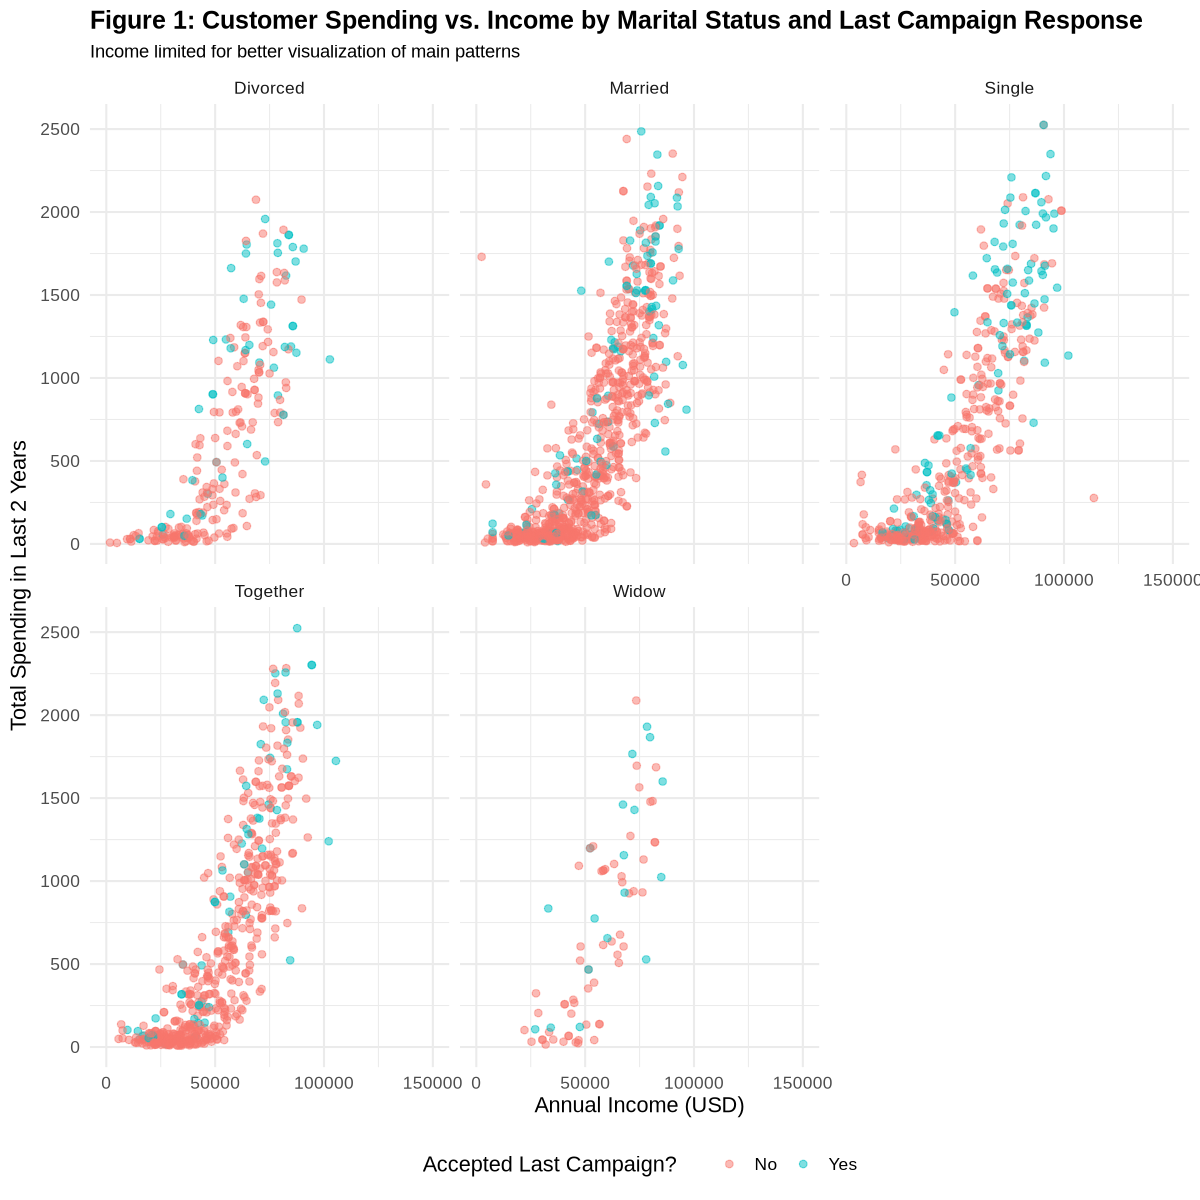

In [28]:
options(repr.plot.width = 10, repr.plot.height = 10)

ggplot(customers_clean,
       aes(x = Income, y = Total_Spending, color = Accepted_Last_Campaign_Offer)) +
  geom_point(alpha = 0.5, size = 1.8) +
  facet_wrap(~ Marital_Status, nrow = 2) +
  scale_color_discrete(labels = c("No", "Yes")) +
  xlim(0, 150000) +  # <-- LIMIT THE X-AXIS (adjust if needed)
  labs(
    title = "Figure 1: Customer Spending vs. Income by Marital Status and Last Campaign Response",
    subtitle = "Income limited for better visualization of main patterns",
    x = "Annual Income (USD)",
    y = "Total Spending in Last 2 Years",
    color = "Accepted Last Campaign?"
  ) +
  theme_minimal(base_size = 13) +
  theme(
    plot.title = element_text(face = "bold", size = 15),
    plot.subtitle = element_text(size = 11),
    legend.position = "bottom"
  )

**Relevance**
- The goal of the analysis is to predict whether a customer will accept the next marketing campaign.
- Marital status, annual income, and total spending in the last 2 years are demographic and behavioral predictors that may be associated with purchasing or decision-making behaviour.

**Interpretation**
- Across several marital groups (particularly married, together, and single), customers who accepted the campaign (Response = 1) tend to show higher overall spending, with moderate to higher income levels.
   - There appears to be a cluster of many single customers with higher than median spending (>$1250) that accepted the last campaign.
- There is no linear pattern within any groups (except possibly the single group), suggesting that interactions between predictors (e.g. between income and marital status) may improve predictive performance.
- There are ~10 outlier customers with especially high incomes (hence the need to bound the x-axis).

**Conclusions**
- Spending behavior and income appear to be meaningful predictors of campaign response, but their effects differ across marital groups.
   - Considering interaction between variables (marital status, annual income, and total spending) may help improve prediction, as different marital groups show distinct response patterns.
- This early exploration helps guide which predictors to keep when building a logistic regression model.

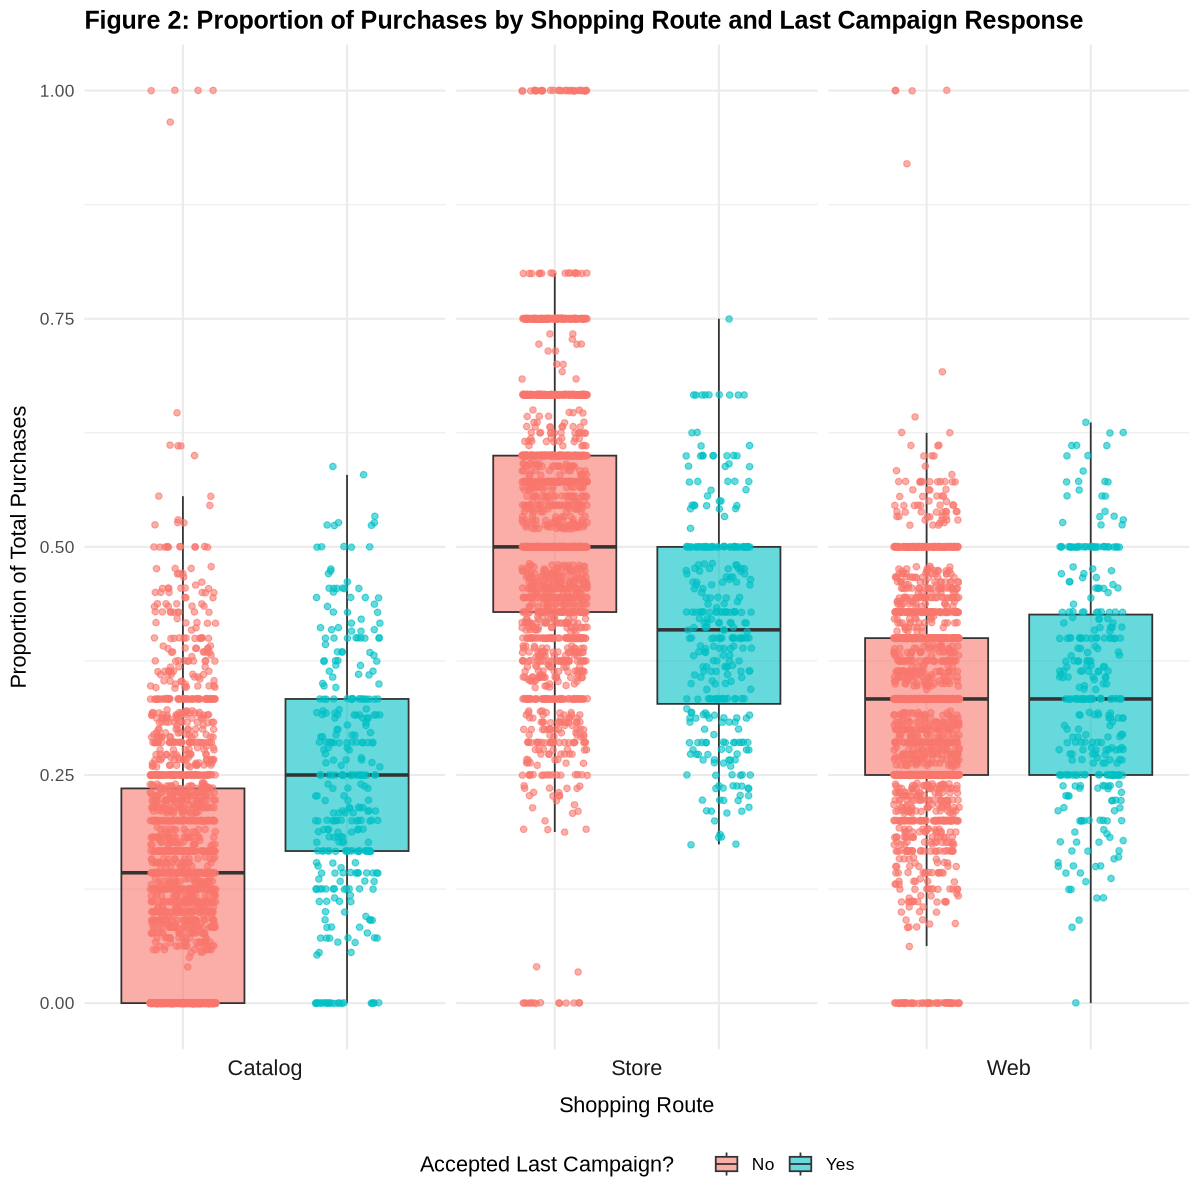

In [30]:
# Selecting the response and proportion-of-purchases variables, then reshaping to long format
customers_long <- customers_clean %>%
  dplyr::select(
    Accepted_Last_Campaign_Offer,
    PropWebPurchases,
    PropCatalogPurchases,
    PropStorePurchases
  ) %>%
  tidyr::pivot_longer(
    cols      = -Accepted_Last_Campaign_Offer,
    names_to  = "Channel",
    values_to = "Prop_Purchases"
  )

# Defining nicer labels for each purchase channel
channel_labels <- c(
  PropWebPurchases     = "Web",
  PropCatalogPurchases = "Catalog",
  PropStorePurchases   = "Store"
)

# Creating boxplots and jittered points of purchase proportions by channel and response
ggplot(
  customers_long,
  aes(
    x    = Accepted_Last_Campaign_Offer,
    y    = Prop_Purchases,
    fill = Accepted_Last_Campaign_Offer
  )
) +
  geom_boxplot(outlier.shape = NA, alpha = 0.6) +
  geom_jitter(
    aes(color = Accepted_Last_Campaign_Offer),
    width       = 0.2,
    alpha       = 0.6,
    size        = 1.5,
    show.legend = FALSE
  ) +
  facet_wrap(
    ~ Channel,
    nrow    = 1,
    switch  = "x",
    labeller = labeller(Channel = channel_labels)
  ) +
  scale_fill_discrete(labels = c("No", "Yes")) +
  labs(
    title = "Figure 2: Proportion of Purchases by Shopping Route and Last Campaign Response",
    x     = "Shopping Route",
    y     = "Proportion of Total Purchases",
    fill  = "Accepted Last Campaign?"
  ) +
  theme_minimal(base_size = 13) +
  theme(
    plot.title  = element_text(face = "bold", size = 15),
    axis.text.x = element_blank(),
    strip.text  = element_text(size = 13),
    legend.position = "bottom"
  )

**Relevance**
- The goal of the analysis is to predict whether a customer will accept the next marketing campaign.
- A customer's activity (proportion of purchases) via each shopping route is a behavioral predictor that may be associated with purchasing or decision-making behaviour.

**Interpretation**
- It appears that customers that accepted the last marketing campaign are associated with a higher median proportion of catalog purchases, lower median proportion of store purchases, and approximately the same median proportion of web purchases as customers that did not accept the last marketing campaign.
- Customers appear to make the largest median proportion of purchases via store, then web, and lastly catalog.
- The distributions of purchase proportions are fairly symmetric for all groups except for the catalog proportions among customers that did not accept the last campaign: this distribution is right-skewed.
- Fewer customers accepted than did not accept the last campaign, but a large enough proportion of the dataset that we can likely predict this variable.
- There are quite a few outlier customers that made all their purchases via store (proportion = 1) and did not accept the last campaign.

**Conclusions**
- A customer's activity (proportion of purchases) via catalog and store appear to be meaningful predictors of campaign response.
- This early exploration helps guide which predictors to keep when building a logistic regression model.

## Methods: Plan (Alec)

- Describe in written English the methods/models you used to perform your analysis from beginning to end.
- Provide a detailed justification of the method(s) used. The analysis must be based on methods learned in class.
   - Make sure that the analysis responded the question posed and that the proposed method is appropriate for the characteristics of the data.
- If a variable selection method is used, you need to describe and justify the method. Furthermore, explain what data will be used, and how final model will be chosen.
- Include a careful model assessment plan relevant to your goal (i.e. diagnostics and/or evaluation, however appropriate), with justifications.

## Methods: Plan (Alec)

The goal of our analysis is to predict whether a customer will accept the next marketing campaign offer (Response = 1). Because the response variable is binary, we use logistic regression models, with ridge-penalized logistic regression serving as our primary predictive method.

### Data Preparation

- Removed observations with missing values.
- Recoded education and marital status into consistent, interpretable categories.
- Created engineered predictors including:
  - Age (2025 - Year_Birth)
  - Customer tenure (days since Dt_Customer)
  - Total spending across all product categories
  - Proportional purchase metrics (web, catalog, store)
- Converted binary indicators (complaints, campaign acceptances) into factors.
- Removed invalid responses (e.g., “YOLO”, “Absurd”).
- Split the cleaned dataset into a 70% training set and 30% testing set.
- Constructed a full model matrix for penalized regression.

### Proposed Modeling Approach

We fit two models:

1. Standard logistic regression  
2. Ridge-penalized logistic regression (primary model for prediction)

The logistic regression model is defined as:

$$
\log\left( \frac{P(Y = 1 \mid X)}{1 - P(Y = 1 \mid X)} \right)
= \beta_0 + \beta_1 X_1 + \cdots + \beta_p X_p
$$

Ridge logistic regression estimates coefficients by solving:

$$
\hat{\beta}^{ridge}
= \arg\min_{\beta}
\left(
- \ell(\beta)
+ \lambda \sum_{j=1}^{p} \beta_j^2
\right)
$$

where $\lambda$ controls the strength of shrinkage.

### Why Ridge Logistic Regression?

**Multicollinearity**
Predictors such as spending categories and purchase counts are highly correlated. Ridge reduces instability caused by multicollinearity.

**Overfitting Prevention**
Ridge shrinks coefficients toward zero, reducing variance and improving generalization on unseen data.

**Retains All Predictors**
Unlike LASSO, ridge does not set coefficients to zero. This aligns with our goal of keeping all customer information for prediction.

**Prediction-Oriented Performance**
Ridge logistic regression often yields superior prediction accuracy compared to standard logistic regression.

**Hyperparameter Selection**

We use 10-fold cross-validation to choose the tuning parameter:

- $\lambda_{min}$: the value of $\lambda$ that minimizes the cross-validation error  
- $\lambda_{1se}$: the largest value within one standard error of the minimum  

Because prediction is our primary goal, we select:

$$
\lambda_{min}
$$

for the final ridge model.

## Model Assessment Plan

After selecting the optimal value of $\lambda$ using 10-fold cross-validation on the training set, we fit the final ridge logistic regression model using a probability threshold of 0.5. This means the model is trained under the default rule

$$
\hat{y}_i =
\begin{cases}
1, & \hat{p}_i > 0.5 \\
0, & \hat{p}_i \le 0.5
\end{cases}
$$

where $\hat{p}_i$ denotes the predicted probability $P(Y_i = 1 \mid X_i)$.

However, because prediction performance can depend strongly on the choice of decision threshold, we conduct a more detailed evaluation after training the model. Specifically, we compute predicted probabilities on the held-out test set and sweep through a sequence of thresholds between 0 and 1 (non-inclusive). For each threshold $t$, classification is defined as:

$$
\hat{y}_i(t) =
\begin{cases}
1, & \hat{p}_i > t \\
0, & \hat{p}_i \le t
\end{cases}
$$

For every threshold value, we compute:

- Misclassification rate  
- Accuracy  
- Sensitivity (true positive rate)  
- Specificity (true negative rate)

Sweeping across multiple thresholds allows us to assess the stability of the ridge logistic regression model and to understand how performance varies as the decision rule changes. Importantly, all threshold-based evaluations are performed exclusively on the test set to ensure an unbiased estimate of predictive performance. The standard logistic regression model is evaluated in the same way and serves as a baseline for comparison.

### Assumptions and Limitations

**Assumptions**
- Linear relationship between predictors and the log-odds of the response  
- Independence of observations  
- Correct model specification  

**Limitations**
- Ridge shrinks coefficients, reducing interpretability (coefficients are never 0)  
- Potential nonlinear or interaction effects are not modeled  
- Predictive performance depends on how representative the training data is  

Ridge logistic regression provides a stable predictive model for determining which customers are most likely to accept future marketing campaigns.


## Code and Results (Alec)

- all the analysis code, from reading the data to visualizing results, must be based on clean, reproducible (e.g. read from an open source and not a local directory in your server or computer), and well-commented code.
- Include no more than 3 visualizations and/or tables to summarize and highlight your results. Ensure your tables and/or figures are labelled with a figure/table number and readable fonts.
   - You may utilize sub-plots as you did in Stage 1 Report.
   - Use easily readable main/axis/legend titles, appropriately sized and without any underscores.
- Make sure to interpret/explain the results you obtain. It’s not enough to just say, “I fitted a linear model with these covariates, and my R-square is 0.87”.
   - If inference is the aim of your project, a detailed interpretation of your fitted models will be required, as well as a discussion of relevant quantities.
      - For example, which coefficient(s) is(are) statistically significant? What are some hypothesis tests of interest? Interpretation of coefficients, how does the model fit the data? among other points.
      - Also explain briefly the key differences between your fitted models.
   - If prediction is the aim, you must highlight the key outcomes from your model fitting/selection/prediction in written English.

### Ridge Logistic Regression Model:

In [14]:
# Setting a seed to ensure reproducibility of the train/test split
set.seed(123)

# Defining the total number of observations to be used for splitting the data
n <- nrow(customers_clean)

# Computing the size of the training set (70% of the full dataset)
train_size <- floor(0.7 * n)

# Randomly selecting indices for the training set
train_index <- sample(seq_len(n), size = train_size)

# Creating training and test datasets based on sampled indices
train_data <- customers_clean[train_index, ]
test_data  <- customers_clean[-train_index, ]

# Building the design matrix (dummy-encoding factors) for training predictors, removing intercept column
x_train <- model.matrix(Accepted_Last_Campaign_Offer ~ ., data = train_data)[, -1]

# Converting the training response variable to numeric (0/1)
y_train <- as.numeric(as.character(train_data$Accepted_Last_Campaign_Offer))

# Building the design matrix for test predictors, matching training structure
x_test  <- model.matrix(Accepted_Last_Campaign_Offer ~ ., data = test_data)[, -1]

# Converting the test response variable to numeric (0/1)
y_test  <- as.numeric(as.character(test_data$Accepted_Last_Campaign_Offer))

# Performing 10-fold cross-validation to select the optimal lambda for ridge logistic regression
cv_ridge <- cv.glmnet(x_train, y_train, alpha = 0, family = "binomial", nfolds = 10)

# Extracting the lambda that minimizes cross-validation error
best_lambda <- cv_ridge$lambda.min

# Extracting the lambda from the 1-standard-error rule (more regularized model)
se_lambda <- cv_ridge$lambda.1se

# Fitting the final ridge logistic regression model using the optimal lambda
final_ridge_model <- glmnet(
  x_train, y_train,
  alpha = 0,
  lambda = best_lambda,
  family = "binomial"
)

# Generating predicted probabilities for the test set using the fitted ridge model
pred_prob <- predict(final_ridge_model, newx = x_test, type = "response")

### Logistic Regression Model: 

In [15]:
# Creating training and test datasets (same split as before)
train_data2 <- customers_clean[train_index, ]
test_data2  <- customers_clean[-train_index, ]

# Converting the response variable in the training data to "No"/"Yes" factor levels
train_data2$Accepted_Last_Campaign_Offer <- factor(
  train_data2$Accepted_Last_Campaign_Offer,
  levels = c("0", "1"),
  labels = c("No", "Yes")
)

# Converting the response variable in the test data to "No"/"Yes" factor levels
test_data2$Accepted_Last_Campaign_Offer <- factor(
  test_data2$Accepted_Last_Campaign_Offer,
  levels = c("0", "1"),
  labels = c("No", "Yes")
)

# Fitting a standard logistic regression model on the training data
logistic_model <- glm(
  Accepted_Last_Campaign_Offer ~ .,
  data   = train_data2,
  family = binomial
)

# Generating predicted probabilities for the test set using the logistic regression model
pred_prob_simple <- predict(
  logistic_model,
  newdata = test_data2,
  type    = "response"
)

### Threshold Sweep (Function and Results). 

In [23]:
# Function: compute_threshold_metrics
# 
# Parameters:
# - probs: numeric vector of predicted probabilities for the positive class.
# - truth: true class labels (factor or convertible to factor).
# - positive_label: the label representing the positive class (e.g., "Yes" or "1").
# - thresholds: numeric vector of probability cutoffs to evaluate (default: 0.95 to 0.05).
#
# Purpose:
# This function computes sensitivity, specificity, precision, and accuracy
# at a sequence of decision thresholds. It returns a data frame where each
# row corresponds to a threshold and the associated performance metrics.
compute_threshold_metrics <- function(probs, truth, positive_label,
                                      thresholds = seq(0.95, 0.05, by = -0.05)) {
  
  # Ensure the truth vector is a factor
  truth <- as.factor(truth)
  
  # Identify the negative label (the other level)
  negative_label <- setdiff(levels(truth), positive_label)
  
  # Loop through each threshold and compute metrics
  metrics_list <- lapply(thresholds, function(th) {
    
    # Convert probabilities to predicted classeses
    pred_class <- ifelse(probs >= th, positive_label, negative_label)
    
    # Convert predictions to factor with the same levels as truth
    pred_factor <- factor(pred_class, levels = levels(truth))

    # Create confusion matrix at this threshold
    cm <- confusionMatrix(
      data      = pred_factor,
      reference = truth,
      positive  = positive_label
    )

    # Extract metrics
    sensitivity <- as.numeric(cm$byClass["Sensitivity"])
    specificity <- as.numeric(cm$byClass["Specificity"])
    precision   <- as.numeric(cm$byClass["Pos Pred Value"])
    accuracy    <- as.numeric(cm$overall["Accuracy"])
    
    # Return as row vector
    c(
      Threshold   = th,
      Sensitivity = sensitivity,
      Specificity = specificity,
      Precision   = precision,
      Accuracy    = accuracy
    )
  })
  
  # Convert list of rows into data frame
  metrics_df <- as.data.frame(do.call(rbind, metrics_list))
  
  # Round values to 3 decimals
  metrics_df <- data.frame(lapply(metrics_df, function(col) {
    if (is.numeric(col)) round(col, 3) else col
  }))
  
  metrics_df
}

set.seed(123)

# Computing threshold-based performance metrics for the simple logistic regression model
metrics_simple <- compute_threshold_metrics(
  probs          = pred_prob_simple,
  truth          = test_data2$Accepted_Last_Campaign_Offer,
  positive_label = "Yes"
)



# Computing threshold-based performance metrics for the ridge logistic regression model
metrics_ridge <- compute_threshold_metrics(
  probs          = as.numeric(pred_prob),
  truth          = factor(y_test, levels = c(0, 1)),
  positive_label = "1"
)



# Adding model identifiers
metrics_simple$model <- "Logistic Regression"
metrics_ridge$model  <- "Ridge Logistic Regression"

# Combining the two tables
metrics_combined <- rbind(metrics_simple, metrics_ridge)

figure_3 <- datatable(
  metrics_combined,
  caption = "Figure 3: Comparison of threshold-based performance metrics across logistic and ridge logistic regression models.",
  options = list(pageLength = 15, autoWidth = TRUE)
)


### Results

In [24]:
figure_3

HTML widgets cannot be represented in plain text (need html)

The primary goal of our project is prediction: identifying which customers are most likely to accept the next marketing campaign. For this reason, our evaluation focuses on out-of-sample predictive performance measured on the test set, rather than on inference or significance testing.

**Performance of the Logistic Regression Model**

The simple logistic regression model provides a baseline for comparison. Across all thresholds, its performance shows the expected sensitivity–specificity trade-off:

- At high thresholds (e.g., 0.95–0.80), specificity is extremely high (> 0.99), but sensitivity is extremely low (< 0.25).  
- As the threshold decreases, sensitivity increases while specificity decreases.  
- The model’s accuracy peaks around thresholds 0.70–0.55, reaching approximately 0.88–0.89.

Overall, logistic regression performs reasonably well but tends to underpredict positive cases, meaning it often fails to identify customers who will accept the campaign.

**Performance of the Ridge Logistic Regression Model**

Ridge regularization improves predictive performance by shrinking correlated coefficients and reducing model variance. Across most thresholds, the ridge logistic regression model achieves:

- Higher overall accuracy  
- More balanced sensitivity and specificity  
- Greater stability across thresholds  
- Better identification of true positives (customers who accept the campaign)

For example:

- At threshold 0.50, ridge logistic regression achieves an accuracy around 0.893, slightly higher than simple logistic regression.
- At threshold 0.40, ridge accuracy reaches approximately 0.904 — one of the highest values across all models and thresholds.

This indicates that the ridge model captures more predictive structure and generalizes better to unseen customers.

**Threshold = 0.40 is the Best Choice**

- Has the highest overall accuracy among all threshold values tested  
- A strong balance between sensitivity and specificity  
- Improved sensitivity relative to logistic regression, meaning it better identifies customers likely to accept the campaign  

At threshold 0.40, the ridge model:

- Captures more true accepters (higher sensitivity)  
- Maintains strong ability to correctly classify non-accepters (specificity)  
- Exhibits stable predictive behavior across thresholds  

**Key Differences Between the Fitted Models**

- Variable Handling: Ridge shrinks coefficients when predictors are correlated, producing more stable predictions than logistic regression.  
- Prediction Accuracy: Ridge consistently shows higher accuracy, sensitivity, and comparable specificity.  
- Threshold Stability: Ridge predictions are less sensitive to changes in threshold.  
- Generalization: Ridge exhibits better out-of-sample performance due to regularization; this means that our logistic regression model was probably overfitting the training data.

# Discussion (Ben)

In this section, you’ll interpret and reflect on the results you obtained in the previous section with respect to the main question/goal of your project.

- Summarize what you found and the implications/impact of your findings
- If relevant, discuss whether your results were what you expected to find
- Discuss how your model could be improved
- Discuss future questions/research this study could lead to

In this study, we fitted a simple Logistic Regression model and a Ridge Logistic Regression model to the Customer Personality Analysis dataset, using a wide range of demographic and lifestyle predictors—such as education level and marital status—to predict whether a customer would accept the next campaign offer. Early data wrangling and exploratory visualization suggested the potential usefulness of interaction terms, and revealed that a customer’s catalog activity is one of the strongest predictors of campaign response.Using sensitivity and specificity as performance metrics, we found that the simple logistic regression model achieved high specificity but suffered from  low sensitivity. In contrast, the ridge logistic regression model improved sensitivity while maintaining strong specificity. Overall, a threshold of 0.40 provided the best balance, achieving a specificity of 0.961 without a major loss in sensitivity.

These results indicate that the model can accurately identify customers who are unlikely to accept the campaign. However, it still struggles to correctly identify customers who will accept the offer. From a marketing perspective, this means the model is useful for reducing wasted resources by showing which demographic groups are unlikely to respond—but it does not reliably reveal which customers should be targeted, due to its relatively low sensitivity (around 50%). This outcome was expected, as other group members working with similar models also reported low sensitivity, suggesting that the modeling approach or the dataset itself may be limiting performance.

To address this issue, future work may require more advanced models that were not covered in the course, especially those capable of capturing nonlinear patterns or interactions—since our EDA highlighted the importance of potential interaction effects, which were not included in the final model due to project constraints. Another possibility is that the training data was not fully representative, which could have biased the model.

As an extension of this study, future research could explore the causal relationships between demographics and marketing responses, which would require controlled experiments to identify causal drivers rather than correlations. Additionally, further work could examine whether the company’s goal should be to maximize sensitivity or specificity—and how this choice affects overall profit—since the ultimate objective of such models is to support more effective and economically efficient marketing strategies.

# References (APA)

Include any citation of literature relevant to the project. The citation format is your choice – just be consistent. Make sure to cite the source of your data as well.

Romero-Hernandez, O. (2021). Customer Personality Analysis [Dataset]. (A. Patel, Ed.). Kaggle.